In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BATTING STATS - IPL_2016.csv")
df1 = pd.read_csv("BOWLING STATS - IPL_2016.csv")

In [3]:
df.shape

(136, 14)

In [4]:
df1.shape

(86, 13)

In [5]:
merged_df = pd.merge(df, df1, on='Player', how='outer')

In [6]:
merged_df

,POS_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Avg_x,BF,SR_x,...,Inns_y,Ov,Runs_y,Wkts,BBI,Avg_y,Econ,SR_y,4w,5w
0,1.0,Virat Kohli,16.0,16.0,4.0,973.0,113,81.08,640.0,152.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,David Warner,17.0,17.0,3.0,848.0,93*,60.57,560.0,151.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,AB de Villiers,16.0,16.0,3.0,687.0,129*,52.84,407.0,168.79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,Gautam Gambhir,15.0,15.0,2.0,501.0,90*,38.53,411.0,121.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,Shikhar Dhawan,17.0,17.0,4.0,501.0,82*,38.53,429.0,116.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,NaN,John Hastings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,37.0,2.0,2/6,18.5,5.55,20.0,0.0,0.0
148,NaN,Varun Aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,227.0,2.0,3/16,113.5,9.59,71.0,0.0,0.0
149,NaN,Trent Boult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,39.0,1.0,4/18,39.0,9.75,24.0,0.0,0.0
150,NaN,Adam Milne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,43.0,1.0,2/21,43.0,10.75,24.0,0.0,0.0


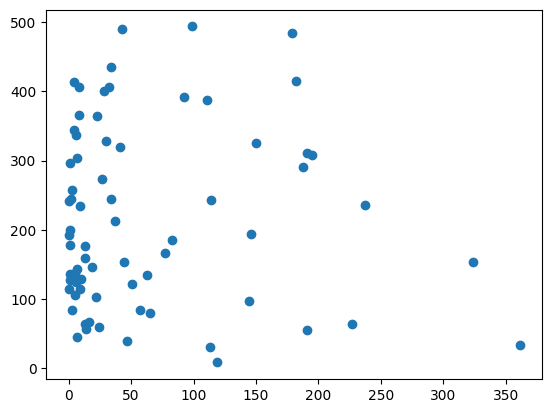

In [7]:
plt.scatter(merged_df['Runs_x'], merged_df['Runs_y'])

In [8]:
x1 = np.array(merged_df['Runs_x'])
x2 = np.array(merged_df['Runs_y'])

In [9]:
from sklearn.impute import KNNImputer,SimpleImputer

In [10]:
knn = KNNImputer(n_neighbors=5)

x1_imputed = knn.fit_transform(x1.reshape(-1,1))
x2_imputed = knn.transform(x2.reshape(-1,1))

In [11]:
X = np.column_stack((x1_imputed, x2_imputed))

In [15]:
from sklearn.cluster import KMeans

In [16]:
wc = []

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit_predict(X)
    wc.append(km.inertia_)

C:\Users\Poojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Poojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Poojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Poojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

In [17]:
km1 = KMeans(n_clusters = 3)

In [18]:
y_means1 = km1.fit_predict(np.array(X))

C:\Users\Poojan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
y_means1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

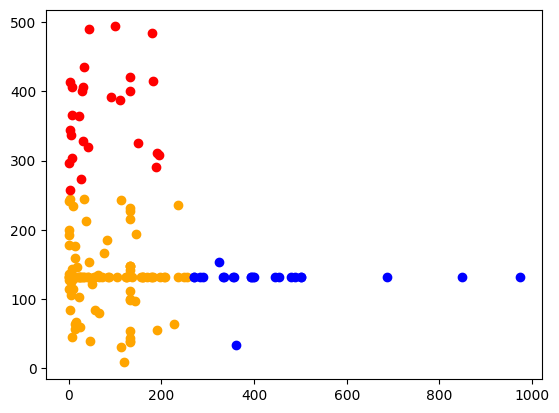

In [20]:
plt.scatter(X[y_means1 == 0,0],X[y_means1 == 0,1],color='orange')
plt.scatter(X[y_means1 == 1,0],X[y_means1 == 1,1],color='blue')
plt.scatter(X[y_means1 == 2,0],X[y_means1 == 2,1],color='red')